In [2]:
"""
Notebook for streaming data from a microphone in realtime

audio is captured using pyaudio
then converted from binary data to ints using struct
then displayed using matplotlib

if you don't have pyaudio, then run

>>> pip install pyaudio

note: with 2048 samples per chunk, I'm getting 20FPS
"""

import pyaudio
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
import time
from tkinter import TclError

# use this backend to display in separate Tk window
%matplotlib tk

# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second

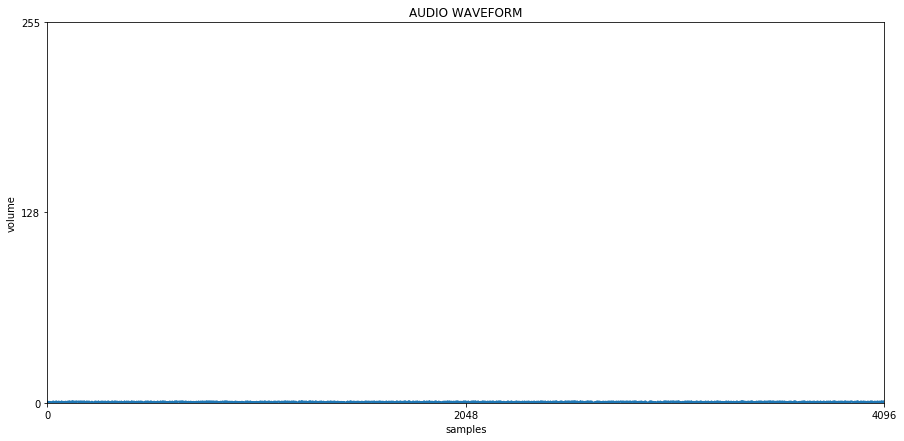

stream started


In [ ]:
# create matplotlib figure and axes
fig, ax = plt.subplots(1, figsize=(15, 7))

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)

# create a line object with random data
line, = ax.plot(x, np.random.rand(CHUNK), '-', lw=2)

# basic formatting for the axes
ax.set_title('AUDIO WAVEFORM')
ax.set_xlabel('samples')
ax.set_ylabel('volume')
ax.set_ylim(0, 255)
ax.set_xlim(0, 2 * CHUNK)
plt.setp(ax, xticks=[0, CHUNK, 2 * CHUNK], yticks=[0, 128, 255])

# show the plot
plt.show(block=False)

print('stream started')

# for measuring frame rate
frame_count = 0
start_time = time.time()

while True:
    
    # binary data
    data = stream.read(CHUNK)  
    
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array(data_int, dtype='b')[::2] + 128
    
    line.set_ydata(data_np)
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        
    except TclError:
        
        # calculate average frame rate
        frame_rate = frame_count / (time.time() - start_time)
        
        print('stream stopped')
        print('average frame rate = {:.0f} FPS'.format(frame_rate))
        break